# Statystyczne metody przetwarzania danych 

## Laboratorium 3 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).

### Zbiór danych

Zbiór danych znajduje się w `dataset/leaf.csv`. Jest to zbiór danych pobrany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 leaf.csv
        +-- 📜 ReadMe.pdf
```

*UWAGA: Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca i materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały.*

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

\begin{equation*}
C = \frac{1}{n - 1} \sum_{i=1}^n (X_i - \bar X)(X_i - \bar X)^T
\end{equation*}

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość). Warstwa prezentacji danych to jeden z głównych elementów wpływających na ocenę.**

Przykład (na podstawie tablicy pomyłek):

Źle (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

### PONIŻEJ WYKONAJ ZADANIE
### wczytywanie danych

In [120]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zaimplementuj funkcję, która zwraca macierz kowariancji (uwaga: biblioteka numpy posiada gotową implementację cov z którą możesz porównać wynik).

In [121]:
# https://stackoverflow.com/questions/23761604/simple-implementation-of-numpy-cov-covariance-function?fbclid=IwAR1lVmEnBetXCofKuV0oGay1ca3qoA9KRP-v1-Csj2Dx_J1o-BhosoMZOng
def my_covar(X):
    X -= X.mean(axis=1)[:, None]
    N = X.shape[1]
    return np.dot(X, X.T.conj())/float(N-1)
X = np.asarray([[1.0,1.0],[2.0,2.0],[3.0,3.0]])

print(np.cov(X))
print(my_covar(X))


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa.

In [122]:
import pandas
import math
# sama funckja wyliczająca odległośc
def euclidean_NM(X,sred_klas,list_of_features ):
    result = []
    for a in sred_klas:
        sum = 0
        for j in list_of_features:
            sum += math.pow(a[j] - X[j], 2)
        result.append(math.sqrt(sum))
    return result

def classify(list_of_trained_examples, single_tested_example, wybrane_cechy):
    distances = euclidean_NM(single_tested_example,list_of_trained_examples,wybrane_cechy)
    mindist = min(distances)
    return single_tested_example, distances.index(mindist)+1



# przygotowanie średnich wartości dla każdej klasy
list_of_features =[2,3,4,5,6,7,8,10,11]
list_of_classes = [3,5,6]

train_dataframe =  pandas.DataFrame(train)
sred_class = np.zeros((40,15))
for i in range(0,40):
    temp = train_dataframe[train_dataframe[0] == i+1]
    for j in range(0,15):
        sred_class[i][j] = temp.iloc[:, j].mean()

test_dataframe = pandas.DataFrame(test)
test_classes = test_dataframe[test_dataframe[0].isin(list_of_classes)]
for i in range(0,len(sred_class)):
    if sred_class[i][0] not in list_of_classes:
        for j in range(0,15):
            sred_class[i][j] = float('Inf')

#classification
list_of_classifed = []
for i in test_classes.to_numpy():
    list_of_classifed.append(classify(sred_class,i,list_of_features))





#printing
counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")

ilość dobrze oznaczonych: 150
ilość wszystkich:154
procent dokładności: 97.40%


### Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa.

In [123]:
import pandas
import math

def machalanobis_NM(x,sred_klasy,list_of_features):
    result = []

    for a in sred_klasy:
        if a[0]==float('Inf'):
            result.append(99999)
            continue
        # a od listy cech i x od listy cech
        newx =[]
        newa =[]
        for i in range(0,15):
            if i in list_of_features:
                newx.append(x[i])
                newa.append(a[i])

        newx = np.array(newx)
        newa = np.array(newa)
        first_part = np.transpose(np.subtract(newx,newa))

        s = train_dataframe[train_dataframe[0] == a[0]]
        s = s.loc[:, list_of_features]
        s = s.to_numpy()
        middle_part = my_covar(s.T)

        last_part = np.subtract(newx,newa)
        mult = np.matmul(first_part,middle_part)
        mult = np.matmul(mult,last_part)
        root=math.sqrt(abs(mult))
        result.append(root)
    return result

def classify(list_of_trained_examples, single_tested_example, list_of_features):
    distances = machalanobis_NM(single_tested_example,list_of_trained_examples,list_of_features)
    mindist = min(distances)
    return single_tested_example, distances.index(mindist)+1

# przygotowanie średnich wartości dla każdej klasy
list_of_features =[2,3,4,5,6,7,8,10,11]
list_of_classes = [3,5,6]

train_dataframe =  pandas.DataFrame(train)
sred_class = np.zeros((40,15))
for i in range(0,40):
    temp = train_dataframe[train_dataframe[0] == i+1]
    for j in range(0,15):
        sred_class[i][j] = temp.iloc[:, j].mean()

test_dataframe = pandas.DataFrame(test)
test_classes = test_dataframe[test_dataframe[0].isin(list_of_classes)]
for i in range(0,len(sred_class)):
    if sred_class[i][0] not in list_of_classes:
        for j in range(0,15):
            sred_class[i][j] = float("Inf")



#classification
list_of_classifed2 = []
for i in test_classes.to_numpy():
    list_of_classifed2.append(classify(sred_class,i,list_of_features))



#printing
counter = 0
for el in list_of_classifed2:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed2)
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed2).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")


ilość dobrze oznaczonych: 131
ilość wszystkich:154
procent dokładności: 85.06%


### Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem kNN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

Klasyfikator NM dla odległości euklidesowej zwraca podobne wyniki do kNN.

Klasyfikator NM dla odległości Machalanobisa dla tych samych danych
co odległość euklidesowa dopasował
niektóre próbki błędnie przez co uzyskane wyniki były mniej dokładne.
Jest też on mniej dokładny niż kNN.



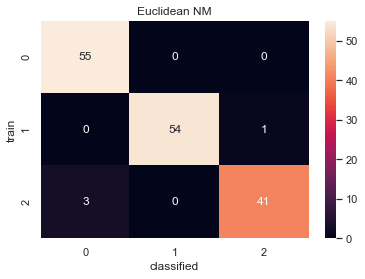

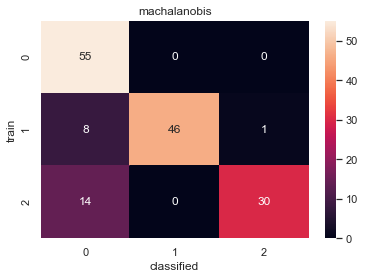

In [124]:
import matplotlib as plt
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("Euclidean NM")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()





import matplotlib as plt
confusion_list =[]
confusion_train =[]
for a in list_of_classifed2:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("machalanobis")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()